# UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# IMPORT LIBRARIES/DATASETS

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Data sets/food11    

/content/drive/MyDrive/Data sets/food11


In [4]:
# List all folders under training
os.listdir("./training")

['Noodles-Pasta',
 'Meat',
 'Soup',
 'Egg',
 'Dairy product',
 'Dessert',
 'Rice',
 'Vegetable-Fruit',
 'Seafood',
 'Fried food',
 'Bread']

In [5]:
# List all folders under validation
os.listdir("./evaluation")

['Dairy product',
 'Dessert',
 'Noodles-Pasta',
 'Seafood',
 'Egg',
 'Rice',
 'Meat',
 'Fried food',
 'Vegetable-Fruit',
 'Soup',
 'Bread']

In [6]:
# Check the number of images in training, validation and evaluation dataset
train = []
valid = []
test = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir("./training"):
    train.extend(os.listdir(os.path.join('training',i)))
    valid.extend(os.listdir(os.path.join('validation',i)))
    test.extend(os.listdir(os.path.join('evaluation',i)))



print('Number of train images: {} \nNumber of validation images: {} \nNumber of test images: {}'.format(len(train),len(valid),len(test)))


Number of train images: 9866 
Number of validation images: 3430 
Number of test images: 3347


In [7]:
#train

# PERFORM DATA EXPLORATION AND DATA VISUALIZATION

In [8]:
train_class = os.listdir(os.path.join('training','Seafood'))
#train_class

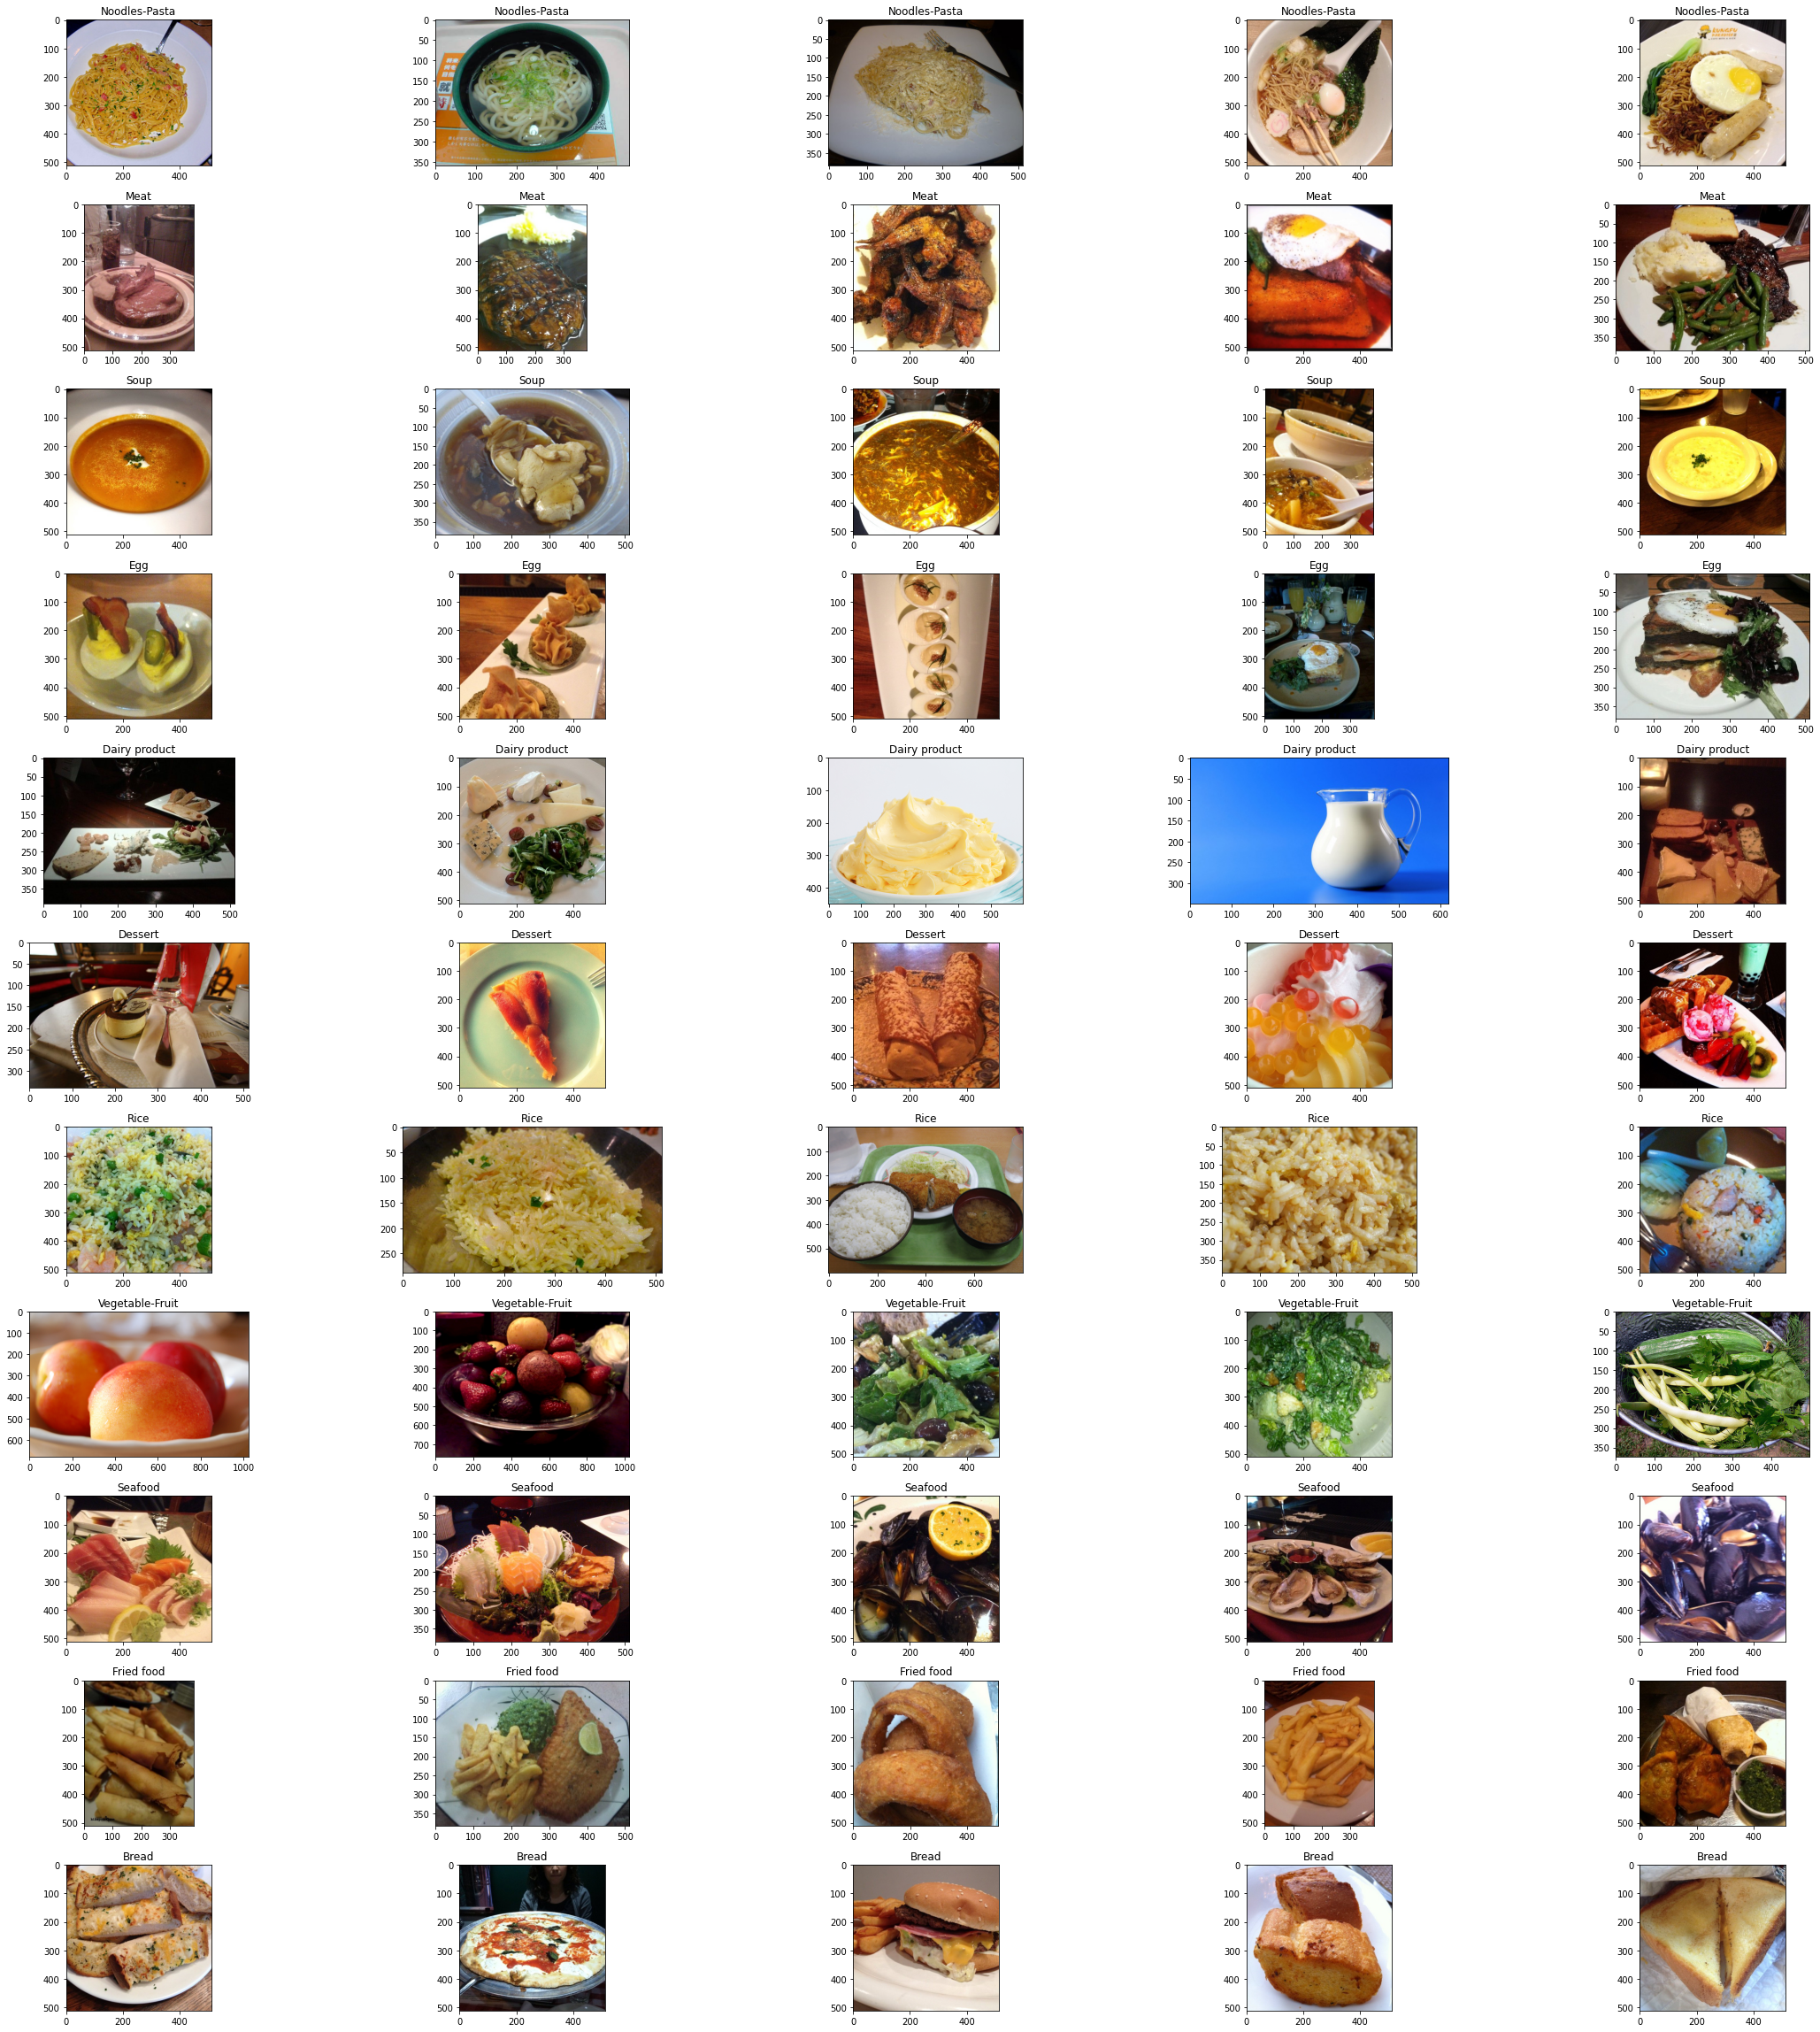

In [9]:
# Visualize the images in the dataset

fig, axs = plt.subplots(11, 5, figsize = (32,32))
count = 0
# for every class in the dataset
for i in os.listdir('./training'):
  # get the list of all images that belong to a particular class
  train_class = os.listdir(os.path.join('training', i))
  
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('training', i, train_class[j])
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(PIL.Image.open(img))  
  count += 1

fig.tight_layout()


In [10]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./training'):
  Class_name.append(i)
  train_class = os.listdir(os.path.join('training',i))
  print('Number of images in {}={}\n'.format(i,len(train_class)))
  No_images_per_class.append(len(train_class))

Number of images in Noodles-Pasta=440

Number of images in Meat=1325

Number of images in Soup=1500

Number of images in Egg=986

Number of images in Dairy product=429

Number of images in Dessert=1500

Number of images in Rice=280

Number of images in Vegetable-Fruit=709

Number of images in Seafood=855

Number of images in Fried food=848

Number of images in Bread=994



In [11]:
No_images_per_class

[440, 1325, 1500, 986, 429, 1500, 280, 709, 855, 848, 994]

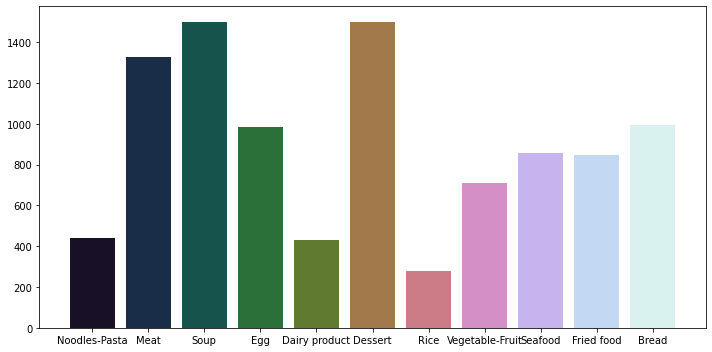

In [12]:
# visualize the number of images in each class in the training dataset

fig = plt.figure(figsize=(10,5))
plt.bar(Class_name, No_images_per_class, color = sns.color_palette("cubehelix",len(Class_name)))
fig.tight_layout()

In [13]:
# check the number of images in each class in the validation dataset

no_images_per_class = []
class_name = []
for i in os.listdir('./training'):
  class_name.append(i)
  train_class = os.listdir(os.path.join('validation',i))
  print('Number of images in {}={}\n'.format(i,len(train_class)))
  no_images_per_class.append(len(train_class))

Number of images in Noodles-Pasta=147

Number of images in Meat=449

Number of images in Soup=500

Number of images in Egg=327

Number of images in Dairy product=144

Number of images in Dessert=500

Number of images in Rice=96

Number of images in Vegetable-Fruit=232

Number of images in Seafood=347

Number of images in Fried food=326

Number of images in Bread=362



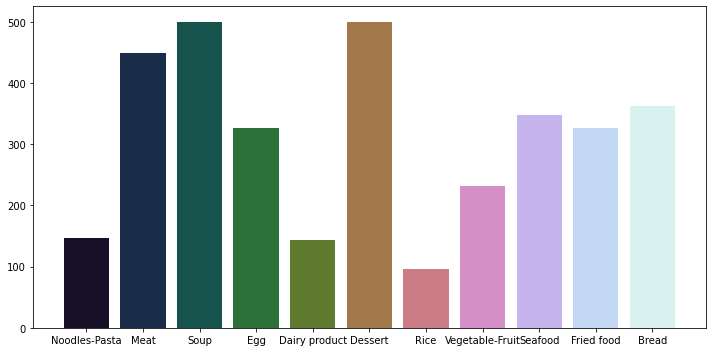

In [14]:
# visualize the number of images in each class in the validation dataset

fig = plt.figure(figsize=(10,5))
plt.bar(class_name, no_images_per_class, color = sns.color_palette("cubehelix",len(Class_name)))
fig.tight_layout()

# PERFORM IMAGE AUGMENTATION AND CREATE DATA GENERATOR

In [15]:
# create run-time augmentation on training and test dataset
# For training datagenerator,  we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True
)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_datagen

In [17]:
# Create data generator for training, validation and test dataset.
train_generator = train_datagen.flow_from_directory(
        'training',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')



test_generator = test_datagen.flow_from_directory(
        'evaluation',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [18]:
train_generator

# UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING 

# BUILD DEEP LEARNING MODEL USING PRE-TRAINED INCEPTIONRESNETV2

In [19]:
# load the inception resnetv2 model
basemodel = InceptionResNetV2(weights = 'imagenet', include_top=False, input_tensor=Input(shape=(256,256,3)))

219070464/219055592 [==============================] - 2s 0us/step


In [20]:
# print the model summary
basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [21]:
# Freeze the basemodel weights , so these weights won't change during training
basemodel.trainable=False

In [22]:
# Add classification head to the model
headmodel=basemodel.output
headmodel=GlobalAveragePooling2D(name='global_average_pool')(headmodel)
headmodel=Flatten(name='flatten')(headmodel)
headmodel=Dense(256, activation='relu',name='dense_1')(headmodel)
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(128, activation='relu',name='dense_2')(headmodel)
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(11, activation='softmax',name='dense_3')(headmodel)



model = Model(inputs = basemodel.input, outputs = headmodel)

# COMPILE AND TRAIN DEEP LEARNING MODEL

In [23]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer= SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

In [24]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [25]:
#history = model.fit(train_generator, steps_per_epoch= train_generator.n // 32, epochs = 1, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer, earlystopping])

# FINE TUNE THE TRAINED MODEL

In [26]:
# unfreeze the weights in the base model, now these weights will be changed during training
basemodel.trainable=True

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [28]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_fine.hdf5", verbose=1, save_best_only=True)

In [29]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer= SGD(learning_rate=0.0001, momentum=0.9), metrics=['accuracy'])

In [30]:
# fine tune the model with very low learning rate
#history = model.fit(train_generator, steps_per_epoch= train_generator.n // 32, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer, earlystopping])

# ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [31]:
# Load a pretrained weight
model.load_weights('weights_fine.hdf5')

In [32]:
# Evaluate the performance of the model
evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


104/104 [==============================] - 605s 6s/step - loss: 0.3561 - accuracy: 0.9008
Accuracy Test : 0.9008413553237915


In [33]:
# assigning label names to the corresponding indexes
labels = {0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3:'Egg', 4: 'Fried food', 5:'Meat',6:'Noodles-Pasta',7:'Rice', 8:'Seafood',9:'Soup',10: 'Vegetable-Fruit'}

In [34]:
# loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0
for i in os.listdir('./evaluation'):
  for item in os.listdir(os.path.join('./evaluation',i)):
    #code to open the image
    img= PIL.Image.open(os.path.join('./evaluation',i,item))
    #resizing the image to (256,256)
    img = img.resize((256,256))
    #appending image to the image list
    image.append(img)
    #converting image to array
    img = np.asarray(img, dtype= np.float32)
    #normalizing the image
    img = img / 255
    #reshaping the image in to a 4D array
    img = img.reshape(-1,256,256,3)
    #making prediction of the model
    predict = model.predict(img)
    #getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    #appending the predicted class to the list
    prediction.append(labels[predict])
    #appending original class to the list
    original.append(i)


In [35]:
# Getting the test accuracy 


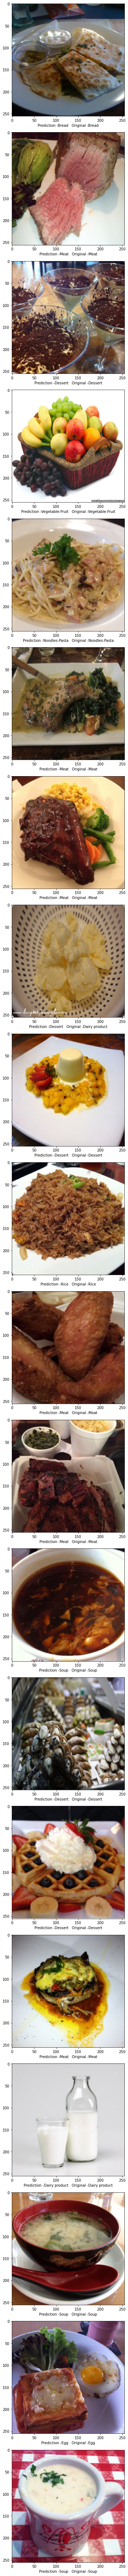

In [36]:
# visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [37]:
# classification report
print(classification_report(np.asarray(original),np.asarray(prediction)))

                 precision    recall  f1-score   support

          Bread       0.88      0.89      0.88       368
  Dairy product       0.83      0.70      0.76       148
        Dessert       0.85      0.86      0.86       500
            Egg       0.88      0.87      0.88       335
     Fried food       0.91      0.89      0.90       287
           Meat       0.91      0.92      0.91       432
  Noodles-Pasta       1.00      0.99      0.99       147
           Rice       0.95      0.96      0.95        96
        Seafood       0.93      0.91      0.92       303
           Soup       0.97      0.97      0.97       500
Vegetable-Fruit       0.86      0.96      0.91       231

       accuracy                           0.90      3347
      macro avg       0.91      0.90      0.90      3347
   weighted avg       0.90      0.90      0.90      3347



Text(0.5, 1.0, 'Confusion_matrix')

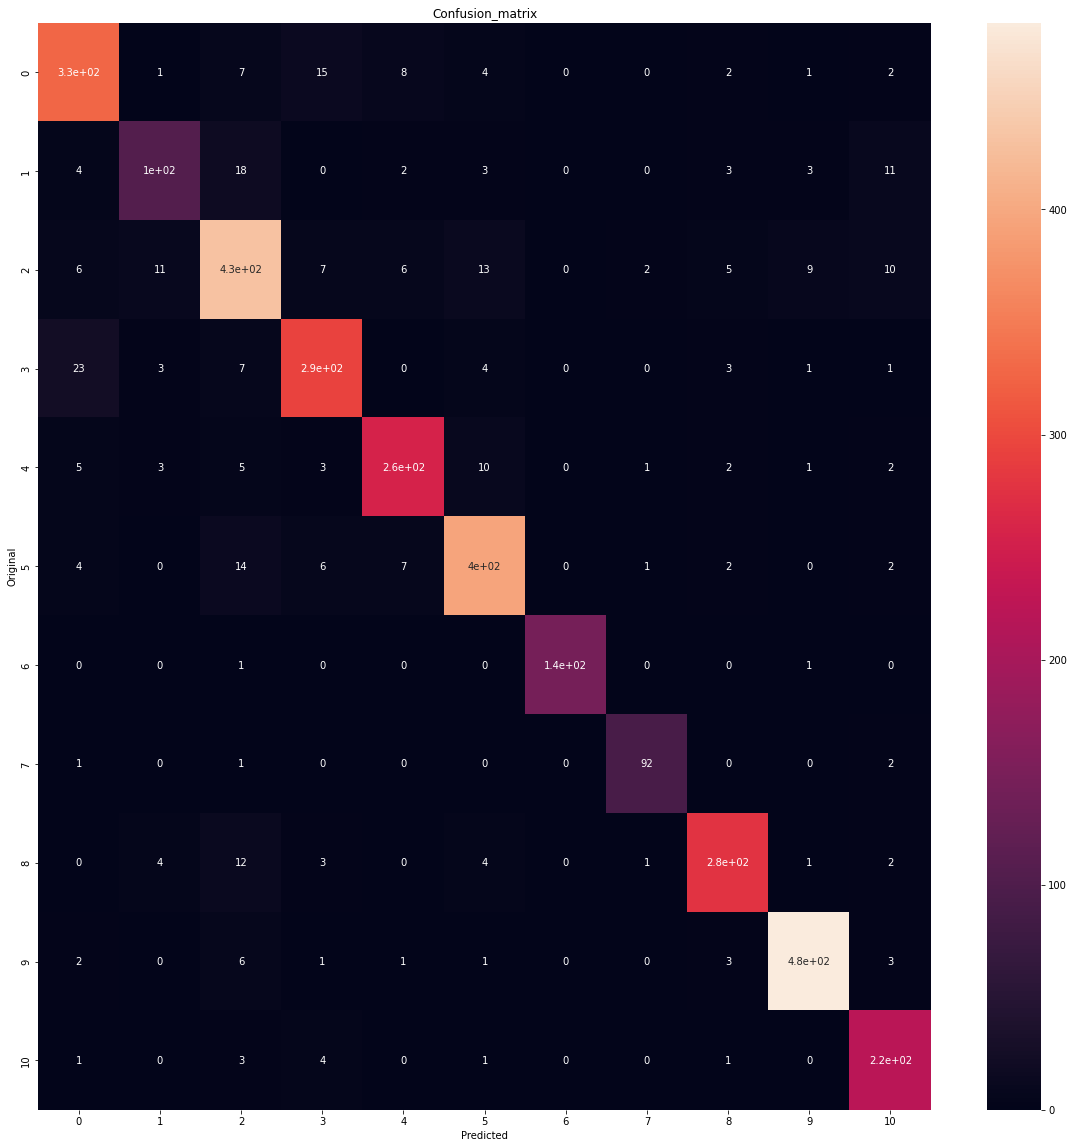

In [38]:
# plot confusion matrix

plt.figure(figsize=(20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
